In [1]:
from __future__ import print_function
import os
import ipywidgets as ipyw
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython
import warnings
warnings.filterwarnings("ignore")
import ouu_synthb


noptmax: 1


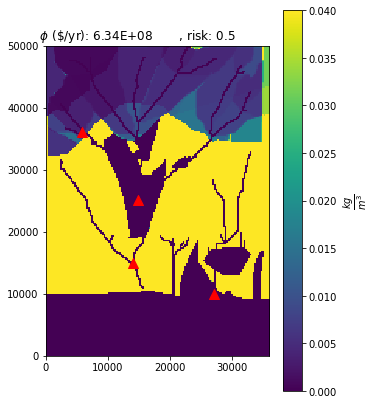

In [2]:
fig,ax = ouu_synthb.run_scenario()

In [3]:
# widget hackery
delta_mn,delta_mx = 50.0,150.0
risk_str = ipyw.Text("0.5")
sw_str = ipyw.Text()
gw_str = ipyw.Text()
str_dict = {"surfacewater":sw_str,
           "groundwater":gw_str}
def set_values(**kwargs):
    for k,v in kwargs.items():
        str_dict[k].value = str(v)
def set_risk(risk):
    risk_str.value = str(risk)
    
w = ipyw.interactive(set_values,surfacewater=(delta_mn,delta_mx,5.0),
                     groundwater=(delta_mn,delta_mx,5.0))

def on_button_clicked(b):  
    risk = float(risk_str.value)
    const_dict = {k:float(v.value) for k,v in str_dict.items()}
    all_const_dict = ouu_synthb.get_const_dict()
    scen_dict = {}
    for cn in all_const_dict.keys():
        if cn.startswith("ucn"):
            scen_dict[cn] = const_dict["groundwater"] / 100.0
        else:
            scen_dict[cn] = const_dict["surfacewater"] / 100.0
    fig,ax = ouu_synthb.run_scenario(scen_dict,risk=risk)
    #fig.savefig("optimal_nconc_r{:02d}.pdf".format(int(risk*100)))

button = ipyw.Button(description="Get Some Science")
button.on_click(on_button_clicked)

interactive(children=(FloatSlider(value=0.5, description='risk', max=0.99, min=0.01, step=0.01), Output()), _dom_classes=('widget-interact',))

interactive(children=(FloatSlider(value=100.0, description='surfacewater', max=150.0, min=50.0, step=5.0), FloatSlider(value=100.0, description='groundwater', max=150.0, min=50.0, step=5.0), Output()), _dom_classes=('widget-interact',))

Button(description='Get Some Science', style=ButtonStyle())

noptmax: 1


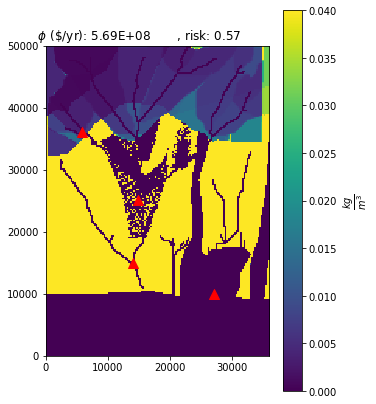

In [4]:
r = ipyw.interact(set_risk,risk=(0.01,0.99,0.01))
display(w)
display(button)